In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


  
img_dst = cv2.imread("ohlf.png")   
display_dst = img_dst.copy()


In [3]:


dst_points = []       



def click_dst(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        dst_points.append((x, y))
        cv2.circle(display_dst, (x, y), 5, (255, 0, 0), -1)
        cv2.imshow("Destination", display_dst)
        print(f"[DST] ({x}, {y})")



cv2.imshow("Destination", display_dst)
cv2.setMouseCallback("Destination", click_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


[DST] (1306, 579)
[DST] (1305, 592)
[DST] (1211, 593)
[DST] (1210, 687)
[DST] (1212, 728)
[DST] (1271, 725)
[DST] (1297, 733)
[DST] (1329, 732)
[DST] (1364, 723)
[DST] (1464, 721)
[DST] (1448, 670)
[DST] (1447, 573)
[DST] (1422, 577)


In [16]:
model_points = [[12.325287,7.550167],[12.492736,6.941592],[19.454712,6.836404],[19.459442,1.892799],[19.485302,0],[15.041031,0],[13.198530,0],[10.708003,0],[8.017597,0],[0,0],[1.925590,2.833141],[1.904824,7.959238],[3.651528,7.845202]]

In [17]:
dst_points = [(1306, 579),(1305, 592),(1211, 593),(1210, 687),(1212, 728),(1271, 725),(1297, 733),(1329, 732),(1364, 723),(1464, 721),(1448, 670),(1447, 573),(1422, 577)]

In [18]:
dst_points = np.array(dst_points, dtype=np.float32)
model_points = np.array(model_points, dtype=np.float32)


In [19]:
h, mask = cv2.findHomography( dst_points,model_points, cv2.RANSAC)
print("\nHomography Matrix:\n", h)


Homography Matrix:
 [[-0.05769772 -0.00147936 85.70188938]
 [-0.00063729 -0.03906822 29.22392784]
 [-0.00012976 -0.00011841  1.        ]]


In [20]:
np.save("Homography for bev to 3d.npy", h)

In [ ]:
import numpy as np
H =h
points_2d = np.array([
    [1306, 579],
    [1100, 820],
    [950, 880]
], dtype=np.float64)


def map_2d_to_3d_y_fixed(points_2d, H, y_value=0.0):
    mapped_points = []
    for (x, y) in points_2d:
        src = np.array([x, y, 1.0], dtype=np.float64)
        dst = H @ src
        dst /= dst[2]  
        X, Z = dst[0], dst[1]
        mapped_points.append([X, y_value, Z])  
    return np.array(mapped_points)

points_3d = map_2d_to_3d_y_fixed(points_2d, H)

print("Mapped 3D points (X, Y=0, Z):\n", points_3d)


Mapped 3D points (X, Y=0, Z):
 [[12.45727598  0.          7.57391683]
 [27.65350546  0.         -4.62138483]
 [38.2992101   0.         -7.45802057]]


In [2]:
import numpy as np
import cv2

In [6]:
image = [(139.75,153.75),(144.75,456.75),(732.75,484.75),(1224.4,61.1),(1055.6,445),(661.6,3.5)]
map = [(5.4657,143.05609),(12.31197,134.9112),(20.18599,135.21727),(33.20502,150.52502),(24.07297,136.41666),(15.85862,155.36353)]

In [7]:
image = np.array(image, dtype=np.float32)
map = np.array(map, dtype=np.float32)
h, mask = cv2.findHomography( image,map, cv2.RANSAC)
print(h)


[[ 4.15200867e-02  9.15930913e-02 -1.06864016e+01]
 [ 1.59331939e-02  5.48745895e-01  1.54708778e+02]
 [ 9.12304475e-05  4.39177026e-03  1.00000000e+00]]


In [3]:
import matplotlib.pyplot as plt
img = cv2.imread("Cam.jpg")   
display_dst = img.copy()

In [4]:
src_points = []       
def click_dst(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        src_points.append((x, y))
        cv2.circle(img, (x, y), 5, (255, 0, 0), -1)
        cv2.imshow("Image", img)
        print(f"({x}, {y})")

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", click_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


(642, 46)


In [8]:
src_pts = np.array(src_points, dtype=np.float32).reshape(-1, 1, 2)
mapped_pts = cv2.perspectiveTransform(src_pts, h)
dst_points = [(round(float(pt[0][0]), 2), round(float(pt[0][1]), 2)) for pt in mapped_pts]

print(dst_points)

[(16.01, 150.87)]


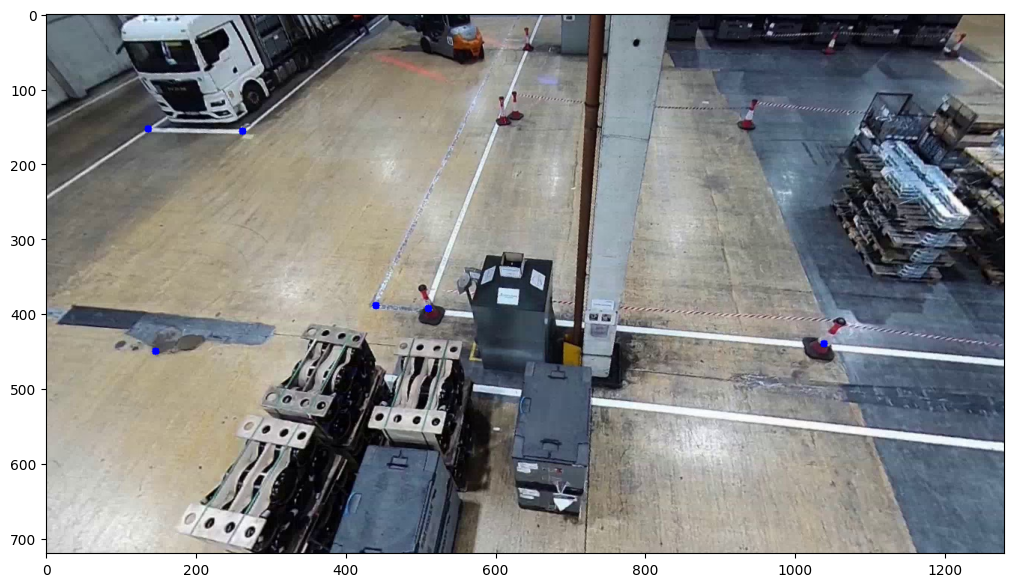

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [21]:
import json

with open("Points/image_object_points_cam_138_view4_1.json", "r") as f:
    data = json.load(f)
    
img_coords = []
map_coords = []

for entry in data:
    img = entry["img-coordinates"]
    mapc = entry["map-coordinates"]

    img_coords.append((img["x"], img["y"]))
    map_coords.append((mapc["x"], mapc["y"]))

print("Image Coordinates:", img_coords)
print("Map Coordinates:", map_coords)
image = np.array(img_coords, dtype=np.float32)
map = np.array(map_coords, dtype=np.float32)
h, mask = cv2.findHomography( image,map, cv2.RANSAC)
print(h)
matrix_list = h.tolist()

with open("Homography/cam_138_view4_1.json", "w") as f:
    json.dump(matrix_list, f, indent=4)


Image Coordinates: [(517.98, 43.88), (1222.98, 76.88), (268.98, 708.88), (909.98, 25.88), (1140.98, 436.88)]
Map Coordinates: [(33.31794, 150.64479), (33.10813, 136.19685), (20.62426, 150.23085), (34.7627, 142.33988), (25.05284, 140.5666)]
[[ 4.88583206e-03  2.03067705e-02  3.42290496e+01]
 [-1.20219656e-02  2.84010521e-01  1.64177475e+02]
 [ 8.66372309e-05  1.95757427e-03  1.00000000e+00]]
